Sri Sivasubramaniya Nadar College of Engineering, Kalavakkam – 603 110
(An Autonomous Institution, Affiliated to Anna University, Chennai)


UCS2612 Machine Learning Laboratory


Academic Year: 2023-2024

Even Batch: 2021-2025


Faculty In-charges: Y.V. Lokeswari & Nilu R Salim


A. No. : 3 Handwritten character recognition using neural networks



Name : V TEJAS

Register number : 3122 21 5001 116

Class : CSE - B


Link to access : https://colab.research.google.com/drive/1g2TEYr8r7nKcXvOPT4oEZ-pJQOWPvnIR?usp=sharing

In [1]:
pwd

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/MyDrive/SEM-6/ML Lab/A-3"

/content/drive/MyDrive/SEM-6/ML Lab/A-3


In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import time
import urllib.request

In [5]:
def read_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)
    return image






def plot_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def img_to_arr(x):
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(64,64))
    return img



In [6]:


df = pd.read_csv("english.csv")
df.head()



,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


(64, 64)


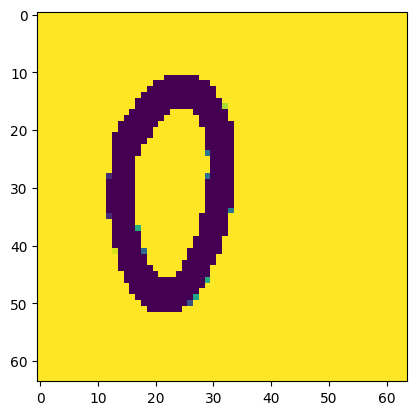

In [7]:


print(img_to_arr(df['image'][0]).shape)
plt.imshow(img_to_arr(df['image'][0]))



In [8]:

start_time = time.time()
import multiprocessing

with multiprocessing.Pool(4) as p:
    images = p.map(img_to_arr, df['image'])
end_time = time.time()
print("with multiprocessing:", end_time-start_time)








x = np.array(images).reshape(3410, 64, 64,1)
x.shape



with multiprocessing: 265.803503036499


(3410, 64, 64, 1)

2


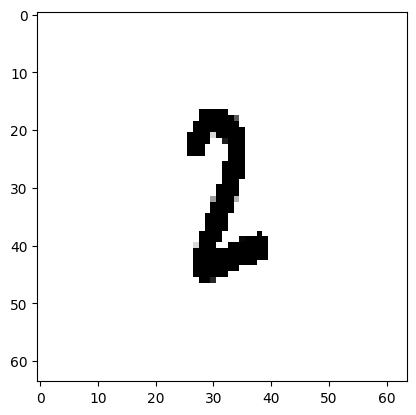

In [9]:


img = x[119].reshape((64,64))
plt.imshow(img,cmap='gray')
print(df['label'].iloc[119])



In [10]:


y = df['label']
le = LabelEncoder()
y_label = le.fit_transform(y)



In [11]:


train_images,test_images,train_labels,test_labels = train_test_split(x,y_label,test_size=0.2,random_state=42)
train_images = train_images/255.0
test_images = test_images/255.0



In [12]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20,validation_data = (test_images,test_labels))

Epoch 1/20
86/86 [==============================] - 12s 52ms/step - loss: 4.1956 - accuracy: 0.0191 - val_loss: 4.0626 - val_accuracy: 0.0396
Epoch 2/20
86/86 [==============================] - 3s 36ms/step - loss: 3.4829 - accuracy: 0.1195 - val_loss: 3.0256 - val_accuracy: 0.2023
Epoch 3/20
86/86 [==============================] - 3s 38ms/step - loss: 2.4440 - accuracy: 0.3068 - val_loss: 2.1658 - val_accuracy: 0.3886
Epoch 4/20
86/86 [==============================] - 3s 38ms/step - loss: 1.6921 - accuracy: 0.5231 - val_loss: 1.6615 - val_accuracy: 0.5411
Epoch 5/20
86/86 [==============================] - 3s 37ms/step - loss: 1.2044 - accuracy: 0.6661 - val_loss: 1.3161 - val_accuracy: 0.6510
Epoch 6/20
86/86 [==============================] - 3s 36ms/step - loss: 0.9102 - accuracy: 0.7364 - val_loss: 1.2421 - val_accuracy: 0.6510
Epoch 7/20
86/86 [==============================] - 3s 37ms/step - loss: 0.6584 - accuracy: 0.8112 - val_loss: 1.1276 - val_accuracy: 0.6657
Epoch 8/20
8

In [13]:


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 512)       13312     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       590080    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 256)         0

In [14]:


predicted_labels = le.inverse_transform(model.predict(test_images).argmax(axis=1))
actual_labels = le.inverse_transform(test_labels)



22/22 [==============================] - 1s 21ms/step


In [15]:


print('predicted label is ;',predicted_labels[67])
print('Actual Label is :',actual_labels[67])



predicted label is ; j
Actual Label is : j


printed label : B
actual label : B


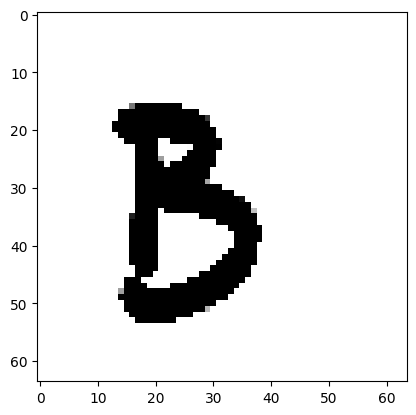

In [16]:
# number of image to be predicted
# change the value of I
i = 450



plt.imshow(test_images[i],cmap='gray')
print('printed label :',predicted_labels[i])
print('actual label :', actual_labels[i])


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 [==============================] - 0s 12ms/step
Accuracy: 0.7375366568914956
Precision: 0.7680969019833043
Recall: 0.7375366568914956
F1 Score: 0.7392137886287967
Confusion Matrix:
[[ 6  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  1  6  0]
 [ 0  0  0 ...  1  0  7]]
